In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


# Import the Excel

In [2]:
# Load the dataset
df = pd.read_excel("Models\IWA.xlsx", sheet_name='Final Raw Sample(3%)')
df.head()

,Year,Company Name,Country,GICS Sub-Industry,Industry (Exiobase),Environmental Intensity (Sales),Environmental Intensity (Op Inc),Total Environmental Cost,Working Capacity,Fish Production Capacity,...,SDG 6,SDG 12.2,SDG 14.1,SDG 14.2,SDG 14.3,SDG 14.c,SDG 15.1,SDG 15.2,SDG 15.5,% Imputed
0,2019,SAGA PLC,UNITED KINGDOM OF GREAT BRITAIN AND NORTHERN I...,Multi-line Insurance,Activities auxiliary to financial intermediati...,-0.010415,-0.046989,-1.148703e+07,-1.123710e+07,-2602.469978,...,-61541.905533,-1059.042606,-4.601425,-0.370166,-1295.252263,-5.484575,71.252219,71.252219,-468.060022,0.006135
1,2019,BURSA MALAYSIA BHD,MALAYSIA,Financial Exchanges & Data,Activities auxiliary to financial intermediati...,-0.006172,-0.012754,-7.244098e+05,-7.079386e+05,-165.923420,...,-4823.472569,-168.146428,-1.369721,-0.435001,-80.693593,-1.632612,16.655875,16.655875,-28.698267,0.043215
2,2019,INTERTEK GROUP PLC,UNITED KINGDOM OF GREAT BRITAIN AND NORTHERN I...,Research & Consulting Services,Activities auxiliary to financial intermediati...,-0.005523,-0.034259,-2.188151e+07,-2.140410e+07,-5012.270759,...,-117104.605466,-3804.051175,-16.528190,-1.329625,-2484.645598,-19.700439,255.935962,255.935962,-892.152710,0.011467
3,2019,JSE LIMITED,SOUTH AFRICA,Financial Exchanges & Data,Activities auxiliary to financial intermediati...,-0.005327,NaN,-8.341370e+05,-8.153911e+05,-184.180256,...,-4396.445439,-901.413470,-0.184194,-0.363841,-91.327105,-0.219547,0.618135,0.618135,-33.382235,0.016390
4,2019,BUREAU VERITAS SA,FRANCE,Research & Consulting Services,Activities auxiliary to financial intermediati...,-0.002534,-0.018462,-1.448471e+07,-1.416778e+07,-3433.217789,...,-77276.296027,-4116.308632,-36.717300,-3.292484,-1668.361350,-43.764435,588.677794,588.677794,-591.706523,0.033005


## Create the Revenue Column based on the Intensity and Total Environmental Cost

In [3]:
df["Revenue"] = df["Total Environmental Cost"]/df["Environmental Intensity (Sales)"]
df["Operating Income"] = df["Total Environmental Cost"]/df["Environmental Intensity (Op Inc)"]
df = df.drop("Industry (Exiobase)", axis=1)
df.head()

,Year,Company Name,Country,GICS Sub-Industry,Environmental Intensity (Sales),Environmental Intensity (Op Inc),Total Environmental Cost,Working Capacity,Fish Production Capacity,Crop Production Capacity,...,SDG 14.1,SDG 14.2,SDG 14.3,SDG 14.c,SDG 15.1,SDG 15.2,SDG 15.5,% Imputed,Revenue,Operating Income
0,2019,SAGA PLC,UNITED KINGDOM OF GREAT BRITAIN AND NORTHERN I...,Multi-line Insurance,-0.010415,-0.046989,-1.148703e+07,-1.123710e+07,-2602.469978,-149400.981817,...,-4.601425,-0.370166,-1295.252263,-5.484575,71.252219,71.252219,-468.060022,0.006135,1.102887e+09,244464000.0
1,2019,BURSA MALAYSIA BHD,MALAYSIA,Financial Exchanges & Data,-0.006172,-0.012754,-7.244098e+05,-7.079386e+05,-165.923420,-9177.045432,...,-1.369721,-0.435001,-80.693593,-1.632612,16.655875,16.655875,-28.698267,0.043215,1.173640e+08,56797000.0
2,2019,INTERTEK GROUP PLC,UNITED KINGDOM OF GREAT BRITAIN AND NORTHERN I...,Research & Consulting Services,-0.005523,-0.034259,-2.188151e+07,-2.140410e+07,-5012.270759,-284492.790136,...,-16.528190,-1.329625,-2484.645598,-19.700439,255.935962,255.935962,-892.152710,0.011467,3.961539e+09,638704000.0
3,2019,JSE LIMITED,SOUTH AFRICA,Financial Exchanges & Data,-0.005327,NaN,-8.341370e+05,-8.153911e+05,-184.180256,-10731.296036,...,-0.184194,-0.363841,-91.327105,-0.219547,0.618135,0.618135,-33.382235,0.016390,1.565900e+08,NaN
4,2019,BUREAU VERITAS SA,FRANCE,Research & Consulting Services,-0.002534,-0.018462,-1.448471e+07,-1.416778e+07,-3433.217789,-188710.049914,...,-36.717300,-3.292484,-1668.361350,-43.764435,588.677794,588.677794,-591.706523,0.033005,5.717172e+09,784560000.0


## Filter for only the Brewery Category

In [4]:
brewery_df = df[df['GICS Sub-Industry'] == 'Brewers']
# Group the data by "Company Name" and count unique years for each group
company_years_count = brewery_df.groupby("Company Name")["Year"].nunique()

# Filter companies with at least 10 years of data
filtered_companies = company_years_count[company_years_count >= 8].index

# Create a new DataFrame with only the companies that meet the criteria
filtered_df = brewery_df[brewery_df["Company Name"].isin(filtered_companies)]
#filtered_df.shape
filtered_df

,Year,Company Name,Country,GICS Sub-Industry,Environmental Intensity (Sales),Environmental Intensity (Op Inc),Total Environmental Cost,Working Capacity,Fish Production Capacity,Crop Production Capacity,...,SDG 14.1,SDG 14.2,SDG 14.3,SDG 14.c,SDG 15.1,SDG 15.2,SDG 15.5,% Imputed,Revenue,Operating Income
519,2019,MOLSON COORS BEVERAGE CO,UNITED STATES OF AMERICA,Brewers,-0.048069,-0.339027,-5.085402e+08,-1.099335e+08,-29928.965649,-1.448611e+06,...,-1080.784815,-117.835584,-13512.921279,-1288.219368,16032.014249,16032.014249,-4470.382055,0.059202,1.057940e+10,1.500000e+09
525,2019,ANHEUSER-BUSCH INBEV,BELGIUM,Brewers,-0.014656,-0.049706,-7.692113e+08,-5.738226e+08,-148508.142003,-7.892568e+06,...,-3800.282607,-117.403486,-69595.453393,-4529.669170,56040.408797,56040.408797,-23485.242748,0.080199,5.248464e+10,1.547524e+10
527,2019,CARLSBERG A/S,DENMARK,Brewers,-0.011643,-0.077417,-1.151570e+08,-7.527218e+07,-24932.542858,-9.632243e+05,...,-1437.329515,-104.089813,-10614.776651,-1713.195534,20369.165732,20247.859126,-3000.167719,0.029599,9.890572e+09,1.487489e+09
532,2019,HEINEKEN HOLDING NV,NETHERLANDS,Brewers,-0.008577,-0.056102,-2.304806e+08,-1.593026e+08,-43440.457121,-2.154098e+06,...,-1416.040953,-60.818961,-19958.750361,-1687.821069,20726.610635,20726.610635,-6546.048034,0.093336,2.687117e+10,4.108276e+09
535,2019,HEINEKEN NV,NETHERLANDS,Brewers,-0.006680,-0.041057,-1.795108e+08,-1.594139e+08,-43465.922058,-2.155579e+06,...,-1416.040953,-60.818961,-19971.482830,-1687.821069,20726.610635,20726.610635,-6550.682671,0.101854,2.687117e+10,4.372284e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13368,2010,HEINEKEN HOLDING NV,NETHERLANDS,Brewers,-0.014876,-0.115547,-3.220233e+08,-1.936780e+08,-67850.075481,-2.547754e+06,...,-2234.946175,-50.798372,-31212.674683,-2663.898408,32862.194165,32862.194165,-8385.894366,0.151424,2.164753e+10,2.786953e+09
13371,2010,CARLSBERG A/S,DENMARK,Brewers,-0.011646,-0.074848,-1.259374e+08,-8.266123e+07,-46875.750497,-1.020688e+06,...,-3135.807631,-110.758712,-19572.986856,-3737.661806,45414.814856,45285.736294,-3683.062568,0.020611,1.081400e+10,1.682586e+09
13372,2010,HEINEKEN NV,NETHERLANDS,Brewers,-0.011321,-0.087939,-2.450821e+08,-1.936780e+08,-67850.075481,-2.547754e+06,...,-2234.946175,-50.798372,-31212.674683,-2663.898408,32862.194165,32862.194165,-8385.894366,0.008737,2.164753e+10,2.786953e+09
13374,2010,KIRIN HOLDINGS CO LTD,JAPAN,Brewers,-0.007504,-0.107791,-2.015159e+08,-1.831167e+08,-44382.550185,-2.433998e+06,...,-551.651117,-38.777747,-21482.424506,-657.529272,7924.919052,7924.919052,-7563.043320,0.006961,2.685426e+10,1.869512e+09


# Boxplots

## Absoulte Values

In [5]:
df_abs_box = filtered_df.melt(id_vars='GICS Sub-Industry', value_vars=[ "Working Capacity","Fish Production Capacity","Crop Production Capacity","Meat Production Capacity","Biodiversity","Abiotic Resources","Water production capacity (Drinking water & Irrigation Water)","Wood Production Capacity"])
df_abs_box

,GICS Sub-Industry,variable,value
0,Brewers,Working Capacity,-1.099335e+08
1,Brewers,Working Capacity,-5.738226e+08
2,Brewers,Working Capacity,-7.527218e+07
3,Brewers,Working Capacity,-1.593026e+08
4,Brewers,Working Capacity,-1.594139e+08
...,...,...,...
555,Brewers,Wood Production Capacity,6.572439e+04
556,Brewers,Wood Production Capacity,9.082963e+04
557,Brewers,Wood Production Capacity,6.572439e+04
558,Brewers,Wood Production Capacity,1.584984e+04


c:\Users\alexa\mambaforge\envs\spm\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\alexa\mambaforge\envs\spm\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\alexa\mambaforge\envs\spm\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


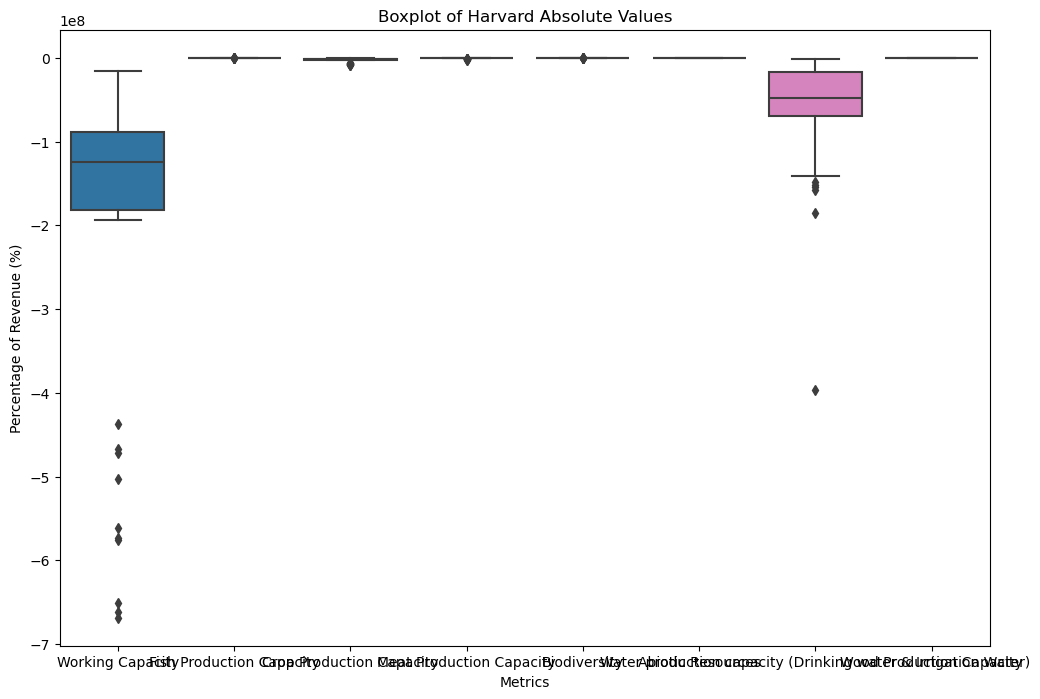

In [6]:
# Create the boxplot
plt.figure(figsize=(12, 8))
sns.boxplot(x='variable', y='value', data=df_abs_box)
plt.xlabel('Metrics')
plt.ylabel('Percentage of Revenue (%)')
plt.title('Boxplot of Harvard Absolute Values')
plt.show()

## Percentage of Revenue

In [7]:
df_rev = filtered_df.copy()
for column in df_rev.loc[:,"Working Capacity":"SDG 15.5"]:
    #print(column)
    df_rev[column] = (df_rev[column] / df_rev['Revenue'])*100
df_rev.head()

,Year,Company Name,Country,GICS Sub-Industry,Environmental Intensity (Sales),Environmental Intensity (Op Inc),Total Environmental Cost,Working Capacity,Fish Production Capacity,Crop Production Capacity,...,SDG 14.1,SDG 14.2,SDG 14.3,SDG 14.c,SDG 15.1,SDG 15.2,SDG 15.5,% Imputed,Revenue,Operating Income
519,2019,MOLSON COORS BEVERAGE CO,UNITED STATES OF AMERICA,Brewers,-0.048069,-0.339027,-5.085402e+08,-1.039128,-0.000283,-0.013693,...,-0.000010,-1.113821e-06,-0.000128,-0.000012,0.000152,0.000152,-0.000042,0.059202,1.057940e+10,1.500000e+09
525,2019,ANHEUSER-BUSCH INBEV,BELGIUM,Brewers,-0.014656,-0.049706,-7.692113e+08,-1.093315,-0.000283,-0.015038,...,-0.000007,-2.236911e-07,-0.000133,-0.000009,0.000107,0.000107,-0.000045,0.080199,5.248464e+10,1.547524e+10
527,2019,CARLSBERG A/S,DENMARK,Brewers,-0.011643,-0.077417,-1.151570e+08,-0.761050,-0.000252,-0.009739,...,-0.000015,-1.052414e-06,-0.000107,-0.000017,0.000206,0.000205,-0.000030,0.029599,9.890572e+09,1.487489e+09
532,2019,HEINEKEN HOLDING NV,NETHERLANDS,Brewers,-0.008577,-0.056102,-2.304806e+08,-0.592838,-0.000162,-0.008016,...,-0.000005,-2.263354e-07,-0.000074,-0.000006,0.000077,0.000077,-0.000024,0.093336,2.687117e+10,4.108276e+09
535,2019,HEINEKEN NV,NETHERLANDS,Brewers,-0.006680,-0.041057,-1.795108e+08,-0.593253,-0.000162,-0.008022,...,-0.000005,-2.263354e-07,-0.000074,-0.000006,0.000077,0.000077,-0.000024,0.101854,2.687117e+10,4.372284e+09


In [8]:
df_rev_box = df_rev.melt(id_vars='GICS Sub-Industry', value_vars=[ "Working Capacity","Fish Production Capacity","Crop Production Capacity","Meat Production Capacity","Biodiversity","Abiotic Resources","Water production capacity (Drinking water & Irrigation Water)","Wood Production Capacity"])
df_rev_box

,GICS Sub-Industry,variable,value
0,Brewers,Working Capacity,-1.039128
1,Brewers,Working Capacity,-1.093315
2,Brewers,Working Capacity,-0.761050
3,Brewers,Working Capacity,-0.592838
4,Brewers,Working Capacity,-0.593253
...,...,...,...
555,Brewers,Wood Production Capacity,0.000304
556,Brewers,Wood Production Capacity,0.000840
557,Brewers,Wood Production Capacity,0.000304
558,Brewers,Wood Production Capacity,0.000059


c:\Users\alexa\mambaforge\envs\spm\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\alexa\mambaforge\envs\spm\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\alexa\mambaforge\envs\spm\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


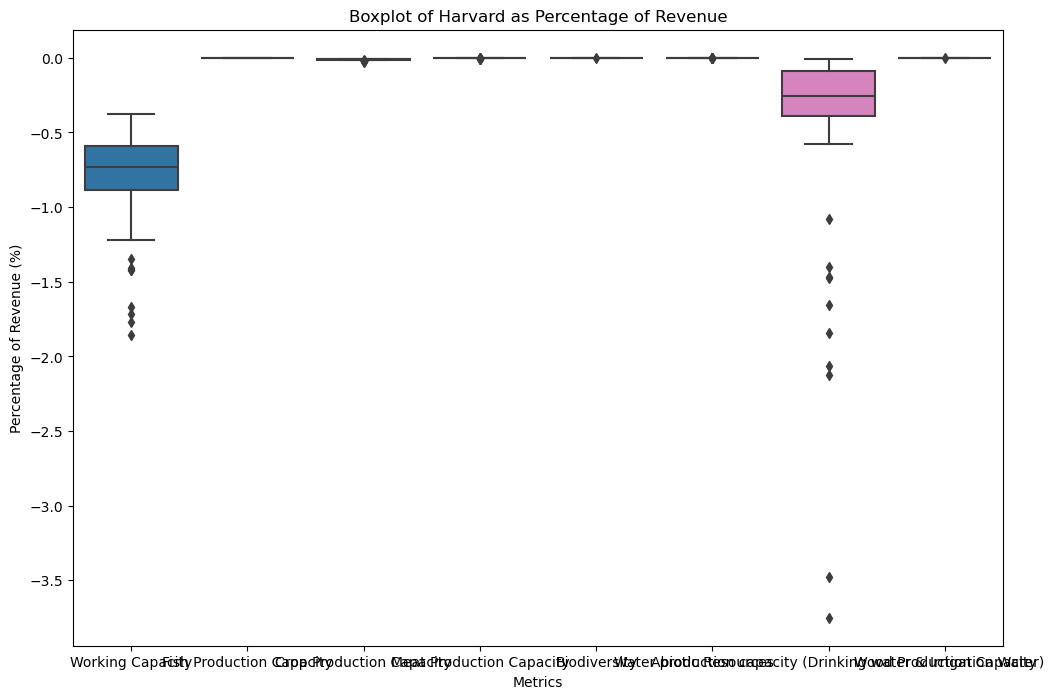

In [9]:
# Create the boxplot
plt.figure(figsize=(12, 8))
sns.boxplot(x='variable', y='value', data=df_rev_box)
plt.xlabel('Metrics')
plt.ylabel('Percentage of Revenue (%)')
plt.title('Boxplot of Harvard as Percentage of Revenue')
plt.show()

## Percentage of Op Income

In [10]:
df_opinc = filtered_df.copy()
for column in df_opinc.loc[:,"Working Capacity":"SDG 15.5"]:
    #print(column)
    df_opinc[column] = (df_opinc[column] / df_opinc['Operating Income'])*100
df_opinc.head()

,Year,Company Name,Country,GICS Sub-Industry,Environmental Intensity (Sales),Environmental Intensity (Op Inc),Total Environmental Cost,Working Capacity,Fish Production Capacity,Crop Production Capacity,...,SDG 14.1,SDG 14.2,SDG 14.3,SDG 14.c,SDG 15.1,SDG 15.2,SDG 15.5,% Imputed,Revenue,Operating Income
519,2019,MOLSON COORS BEVERAGE CO,UNITED STATES OF AMERICA,Brewers,-0.048069,-0.339027,-5.085402e+08,-7.328899,-0.001995,-0.096574,...,-0.000072,-7.855706e-06,-0.000901,-0.000086,0.001069,0.001069,-0.000298,0.059202,1.057940e+10,1.500000e+09
525,2019,ANHEUSER-BUSCH INBEV,BELGIUM,Brewers,-0.014656,-0.049706,-7.692113e+08,-3.708004,-0.000960,-0.051001,...,-0.000025,-7.586537e-07,-0.000450,-0.000029,0.000362,0.000362,-0.000152,0.080199,5.248464e+10,1.547524e+10
527,2019,CARLSBERG A/S,DENMARK,Brewers,-0.011643,-0.077417,-1.151570e+08,-5.060352,-0.001676,-0.064755,...,-0.000097,-6.997686e-06,-0.000714,-0.000115,0.001369,0.001361,-0.000202,0.029599,9.890572e+09,1.487489e+09
532,2019,HEINEKEN HOLDING NV,NETHERLANDS,Brewers,-0.008577,-0.056102,-2.304806e+08,-3.877602,-0.001057,-0.052433,...,-0.000034,-1.480401e-06,-0.000486,-0.000041,0.000505,0.000505,-0.000159,0.093336,2.687117e+10,4.108276e+09
535,2019,HEINEKEN NV,NETHERLANDS,Brewers,-0.006680,-0.041057,-1.795108e+08,-3.646011,-0.000994,-0.049301,...,-0.000032,-1.391011e-06,-0.000457,-0.000039,0.000474,0.000474,-0.000150,0.101854,2.687117e+10,4.372284e+09


In [11]:
df_opinc_box = df_opinc.melt(id_vars='GICS Sub-Industry', value_vars=[ "Working Capacity","Fish Production Capacity","Crop Production Capacity","Meat Production Capacity","Biodiversity","Abiotic Resources","Water production capacity (Drinking water & Irrigation Water)","Wood Production Capacity"])
df_opinc_box

,GICS Sub-Industry,variable,value
0,Brewers,Working Capacity,-7.328899
1,Brewers,Working Capacity,-3.708004
2,Brewers,Working Capacity,-5.060352
3,Brewers,Working Capacity,-3.877602
4,Brewers,Working Capacity,-3.646011
...,...,...,...
555,Brewers,Wood Production Capacity,0.002358
556,Brewers,Wood Production Capacity,0.005398
557,Brewers,Wood Production Capacity,0.002358
558,Brewers,Wood Production Capacity,0.000848


c:\Users\alexa\mambaforge\envs\spm\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\alexa\mambaforge\envs\spm\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\alexa\mambaforge\envs\spm\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


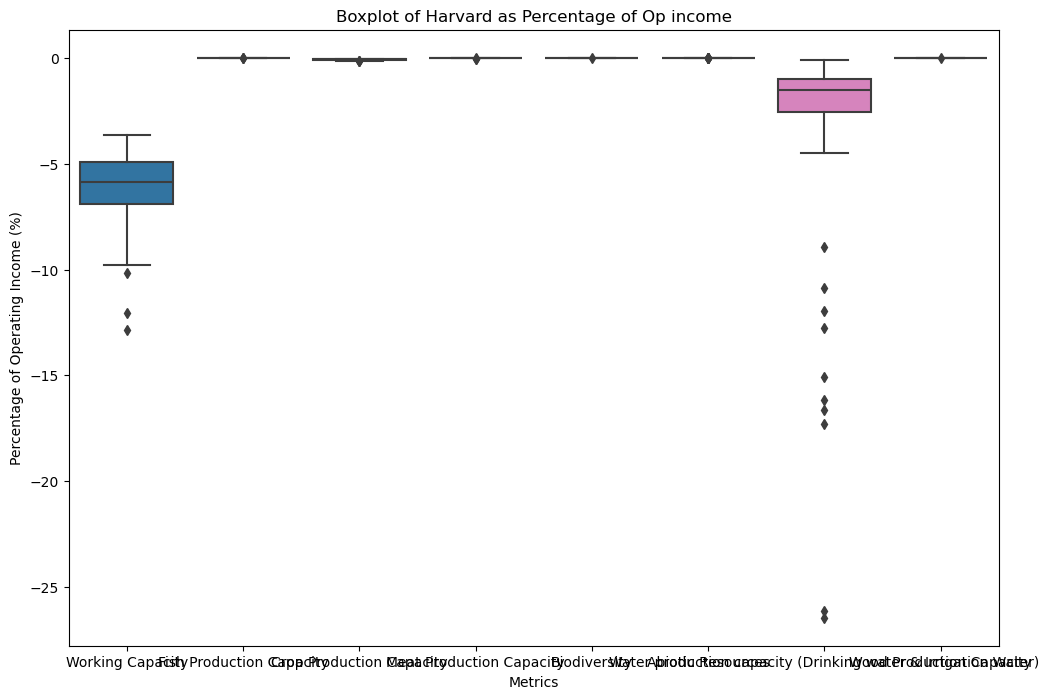

In [12]:
# Create the boxplot
plt.figure(figsize=(12, 8))
sns.boxplot(x='variable', y='value', data=df_opinc_box)
plt.xlabel('Metrics')
plt.ylabel('Percentage of Operating Income (%)')
plt.title('Boxplot of Harvard as Percentage of Op income')
plt.show()

## On Total Environmental Cost

In [13]:
df_cost = filtered_df.copy()
for column in df_cost.loc[:,"Working Capacity":"SDG 15.5"]:
    #print(column)
    df_cost[column] = (df_cost[column] / df_cost['Total Environmental Cost']) * 100
df_cost.head()

,Year,Company Name,Country,GICS Sub-Industry,Environmental Intensity (Sales),Environmental Intensity (Op Inc),Total Environmental Cost,Working Capacity,Fish Production Capacity,Crop Production Capacity,...,SDG 14.1,SDG 14.2,SDG 14.3,SDG 14.c,SDG 15.1,SDG 15.2,SDG 15.5,% Imputed,Revenue,Operating Income
519,2019,MOLSON COORS BEVERAGE CO,UNITED STATES OF AMERICA,Brewers,-0.048069,-0.339027,-5.085402e+08,21.617463,0.005885,0.284857,...,0.000213,0.000023,0.002657,0.000253,-0.003153,-0.003153,0.000879,0.059202,1.057940e+10,1.500000e+09
525,2019,ANHEUSER-BUSCH INBEV,BELGIUM,Brewers,-0.014656,-0.049706,-7.692113e+08,74.598825,0.019307,1.026060,...,0.000494,0.000015,0.009048,0.000589,-0.007285,-0.007285,0.003053,0.080199,5.248464e+10,1.547524e+10
527,2019,CARLSBERG A/S,DENMARK,Brewers,-0.011643,-0.077417,-1.151570e+08,65.364819,0.021651,0.836444,...,0.001248,0.000090,0.009218,0.001488,-0.017688,-0.017583,0.002605,0.029599,9.890572e+09,1.487489e+09
532,2019,HEINEKEN HOLDING NV,NETHERLANDS,Brewers,-0.008577,-0.056102,-2.304806e+08,69.117571,0.018848,0.934611,...,0.000614,0.000026,0.008660,0.000732,-0.008993,-0.008993,0.002840,0.093336,2.687117e+10,4.108276e+09
535,2019,HEINEKEN NV,NETHERLANDS,Brewers,-0.006680,-0.041057,-1.795108e+08,88.804658,0.024214,1.200807,...,0.000789,0.000034,0.011126,0.000940,-0.011546,-0.011546,0.003649,0.101854,2.687117e+10,4.372284e+09


In [14]:
df_melted = df_cost.melt(id_vars='GICS Sub-Industry', value_vars=[ "Working Capacity","Fish Production Capacity","Crop Production Capacity","Meat Production Capacity","Biodiversity","Abiotic Resources","Water production capacity (Drinking water & Irrigation Water)","Wood Production Capacity"])
df_melted

,GICS Sub-Industry,variable,value
0,Brewers,Working Capacity,21.617463
1,Brewers,Working Capacity,74.598825
2,Brewers,Working Capacity,65.364819
3,Brewers,Working Capacity,69.117571
4,Brewers,Working Capacity,88.804658
...,...,...,...
555,Brewers,Wood Production Capacity,-0.020410
556,Brewers,Wood Production Capacity,-0.072123
557,Brewers,Wood Production Capacity,-0.026817
558,Brewers,Wood Production Capacity,-0.007865


c:\Users\alexa\mambaforge\envs\spm\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\alexa\mambaforge\envs\spm\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\alexa\mambaforge\envs\spm\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


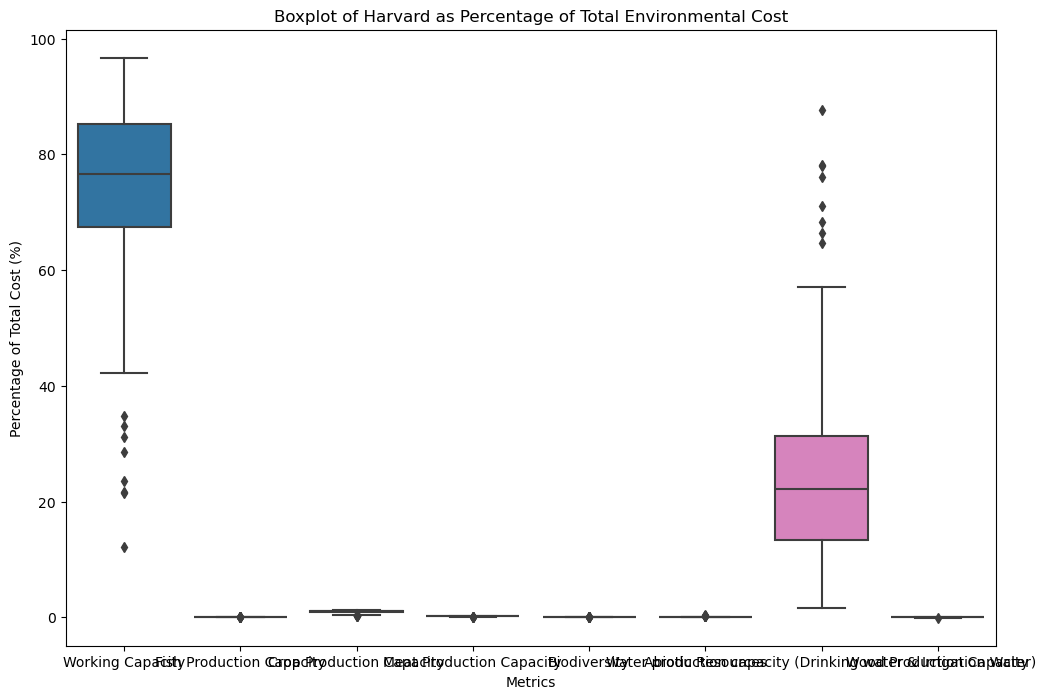

In [15]:
# Create the boxplot
plt.figure(figsize=(12, 8))
sns.boxplot(x='variable', y='value', data=df_melted)
plt.xlabel('Metrics')
plt.ylabel('Percentage of Total Cost (%)')
plt.title('Boxplot of Harvard as Percentage of Total Environmental Cost')
plt.show()

## On SDGs

In [21]:
df_opinc_box = df_opinc.melt(id_vars='GICS Sub-Industry', value_vars=df_opinc.loc[:,"SDG 1.5":"SDG 6"])
df_opinc_box

,GICS Sub-Industry,variable,value
0,Brewers,SDG 1.5,-3.152691
1,Brewers,SDG 1.5,-1.622095
2,Brewers,SDG 1.5,-2.105481
3,Brewers,SDG 1.5,-1.699803
4,Brewers,SDG 1.5,-1.598305
...,...,...,...
625,Brewers,SDG 6,-4.486627
626,Brewers,SDG 6,-2.476956
627,Brewers,SDG 6,-1.725864
628,Brewers,SDG 6,-0.819802


c:\Users\alexa\mambaforge\envs\spm\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\alexa\mambaforge\envs\spm\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\alexa\mambaforge\envs\spm\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


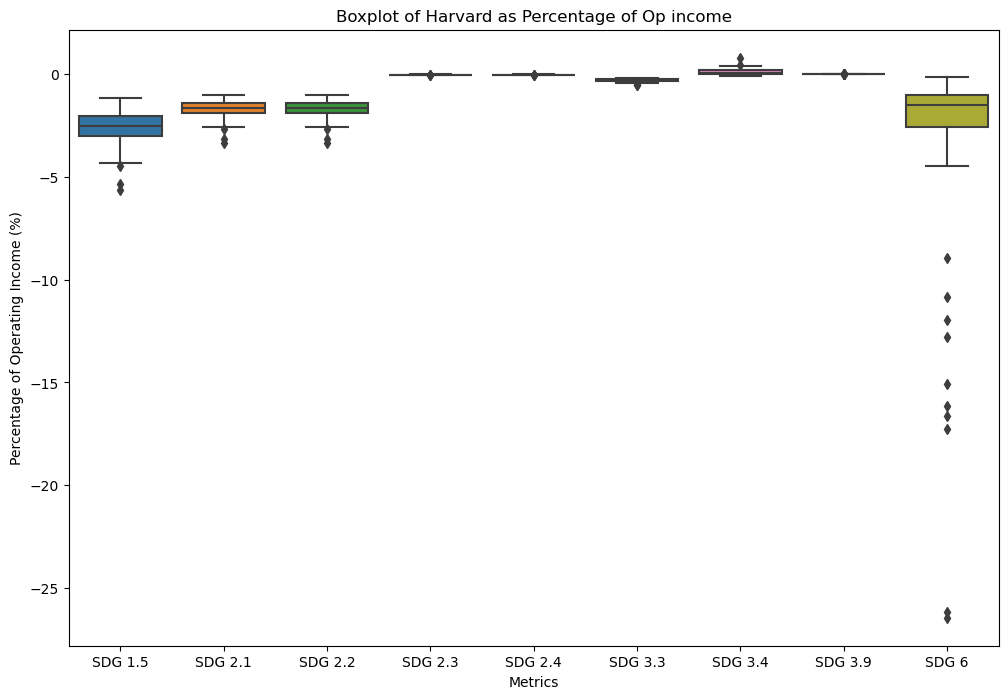

In [22]:
# Create the boxplot
plt.figure(figsize=(12, 8))
sns.boxplot(x='variable', y='value', data=df_opinc_box)
plt.xlabel('Metrics')
plt.ylabel('Percentage of Operating Income (%)')
plt.title('Boxplot of Harvard as Percentage of Op income')
plt.show()

# Further Analysis here

c:\Users\alexa\mambaforge\envs\spm\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\alexa\mambaforge\envs\spm\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\alexa\mambaforge\envs\spm\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\alexa\mambaforge\envs\spm\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Categorica

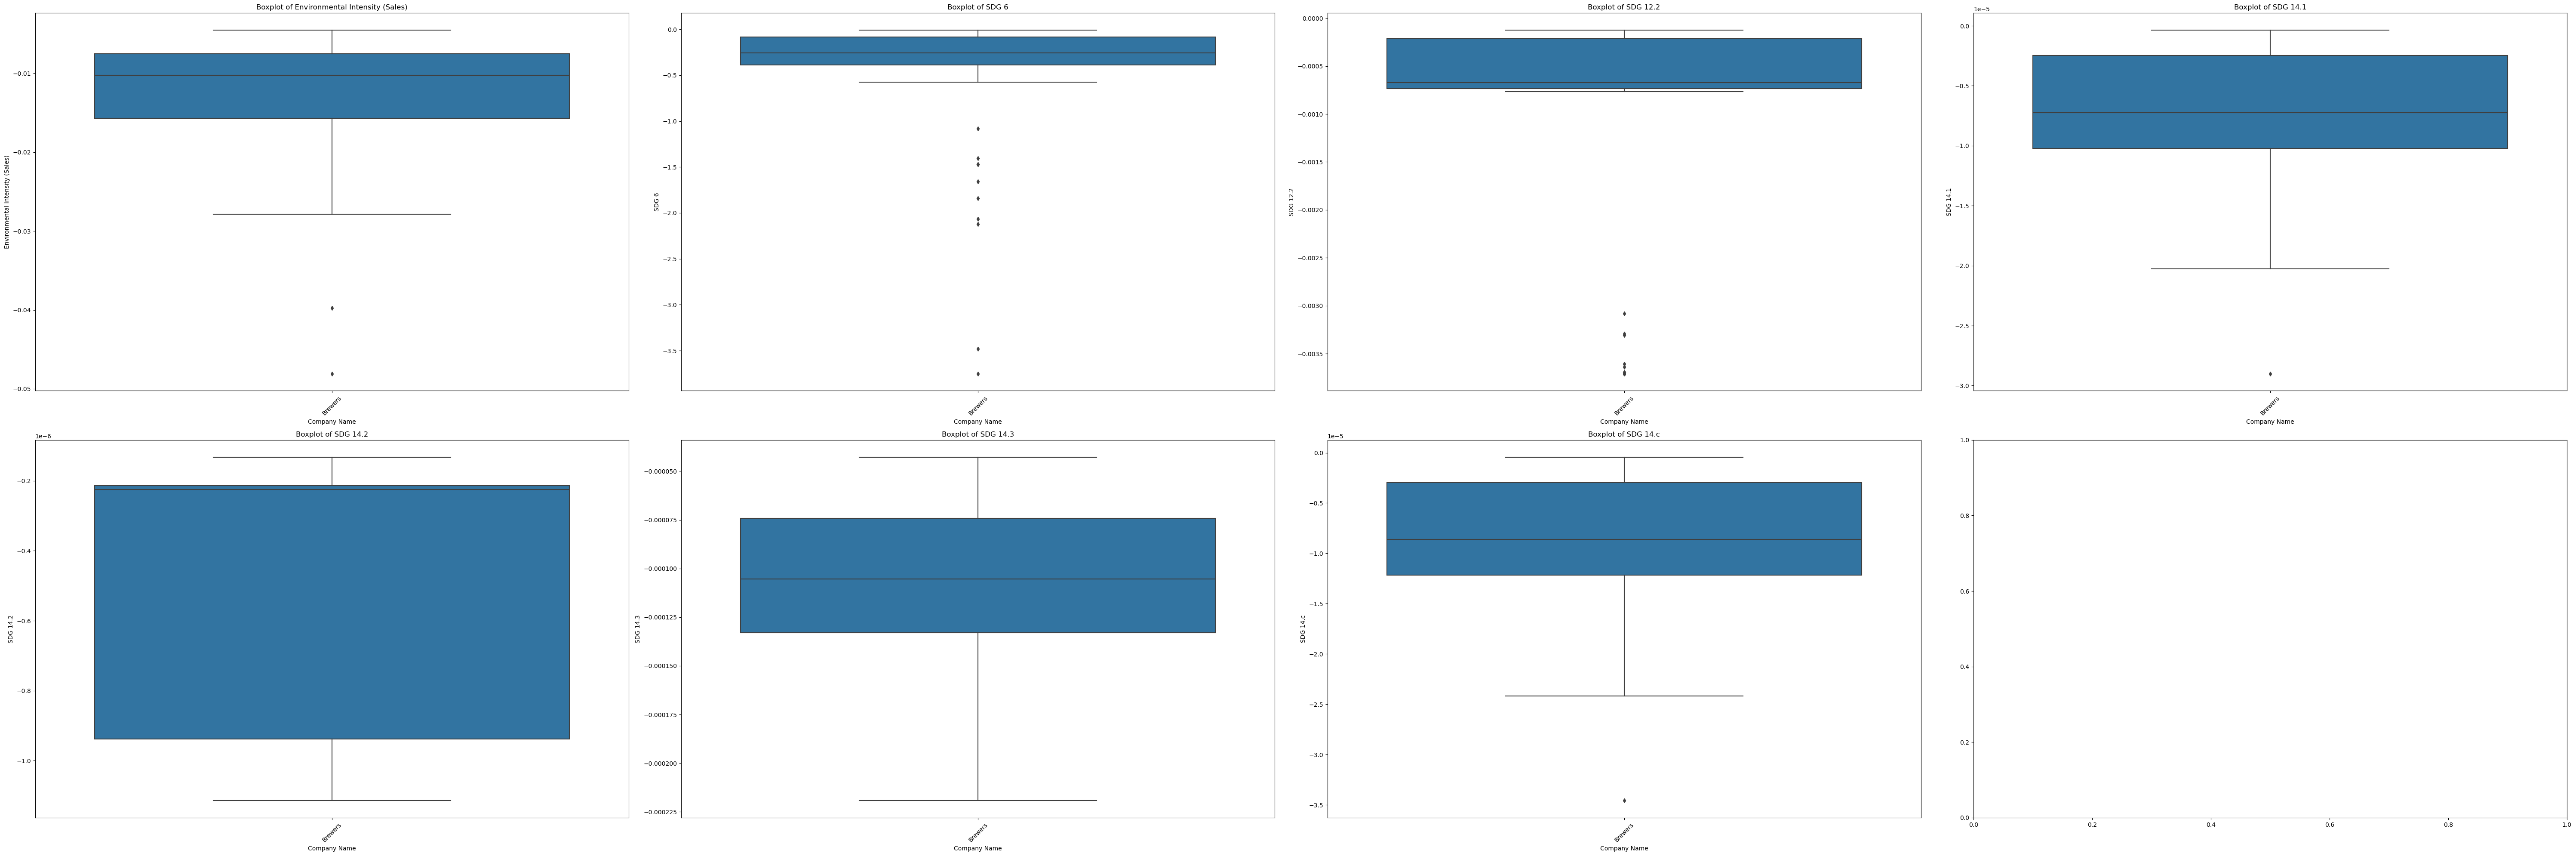

In [20]:
# List of y variables
y_vars = ["Environmental Intensity (Sales)", "SDG 6", "SDG 12.2", "SDG 14.1", "SDG 14.2", "SDG 14.3", "SDG 14.c"]

# Number of rows and columns for the subplot grid
nrows = 2
ncols = 4

# Create a grid of subplots with 2 rows and 4 columns
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15 * ncols, 10 * nrows))

# Loop through each y variable and create a boxplot on the corresponding subplot axis
for i, y_var in enumerate(y_vars):
    row = i // ncols
    col = i % ncols
    sns.boxplot(x="GICS Sub-Industry", y=y_var, data=filtered_df, ax=axes[row, col])
    axes[row, col].set_xlabel("Company Name")
    axes[row, col].set_ylabel(y_var)
    axes[row, col].set_title(f"Boxplot of {y_var}")
    axes[row, col].tick_params(axis='x', rotation=45)  # Rotate x-labels for better visibility

# Adjust the layout to prevent overlap
plt.tight_layout()
plt.show()


c:\Users\alexa\mambaforge\envs\spm\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\alexa\mambaforge\envs\spm\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\alexa\mambaforge\envs\spm\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


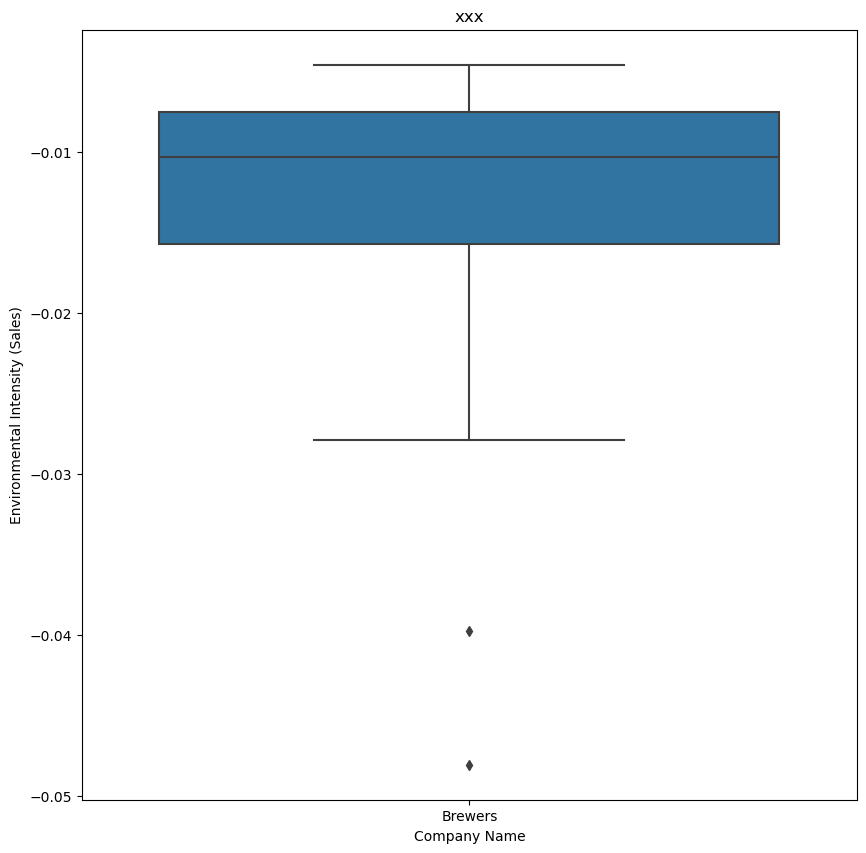

In [15]:
# Create a boxplot of Total Knowledge by Training Type
plt.figure(figsize=(10, 10))
sns.boxplot(x="GICS Sub-Industry", y="Environmental Intensity (Sales)", data=filtered_df)
plt.xlabel("Company Name")
plt.ylabel("Environmental Intensity (Sales)")
plt.title("xxx")
plt.show()